In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
638,4913-EHYUI,Male,1,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.55,5794.65,Yes
2464,2609-IAICY,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15,Yes
1733,1015-OWJKI,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.05,19.05,No
4723,4274-OWWYO,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,74.35,Yes
2296,4706-DGAHW,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.20,45.2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From above information, we can group our features into 3 distincive parts:

1) Demographic Features: Gender, Partner, Dependants, SeniorCitizens

2) Financial and Account Features: Contracts, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

3) Customer Services: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

# MISSING VALUES

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.fillna(df.mode().iloc[0], inplace=True)

The data is clean since there are no missing values.

# EDA

This part will involve rigorous data analysis and visualizations to learn the relationship between features and "Churn":

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
categorical_df = df.select_dtypes(include=['object'])

In [10]:
categorical_df.sample(5)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
997,1374-DMZUI,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,424.45,Yes
6693,7895-VONWT,Female,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1293.8,No
3611,5693-PIPCS,Male,No,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),4220.35,No
3122,8395-ETZKQ,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),1193.55,No
1546,7114-AEOZE,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),1128.1,No


In [11]:
categorical_df = categorical_df.drop(["customerID", "TotalCharges"], axis=1)

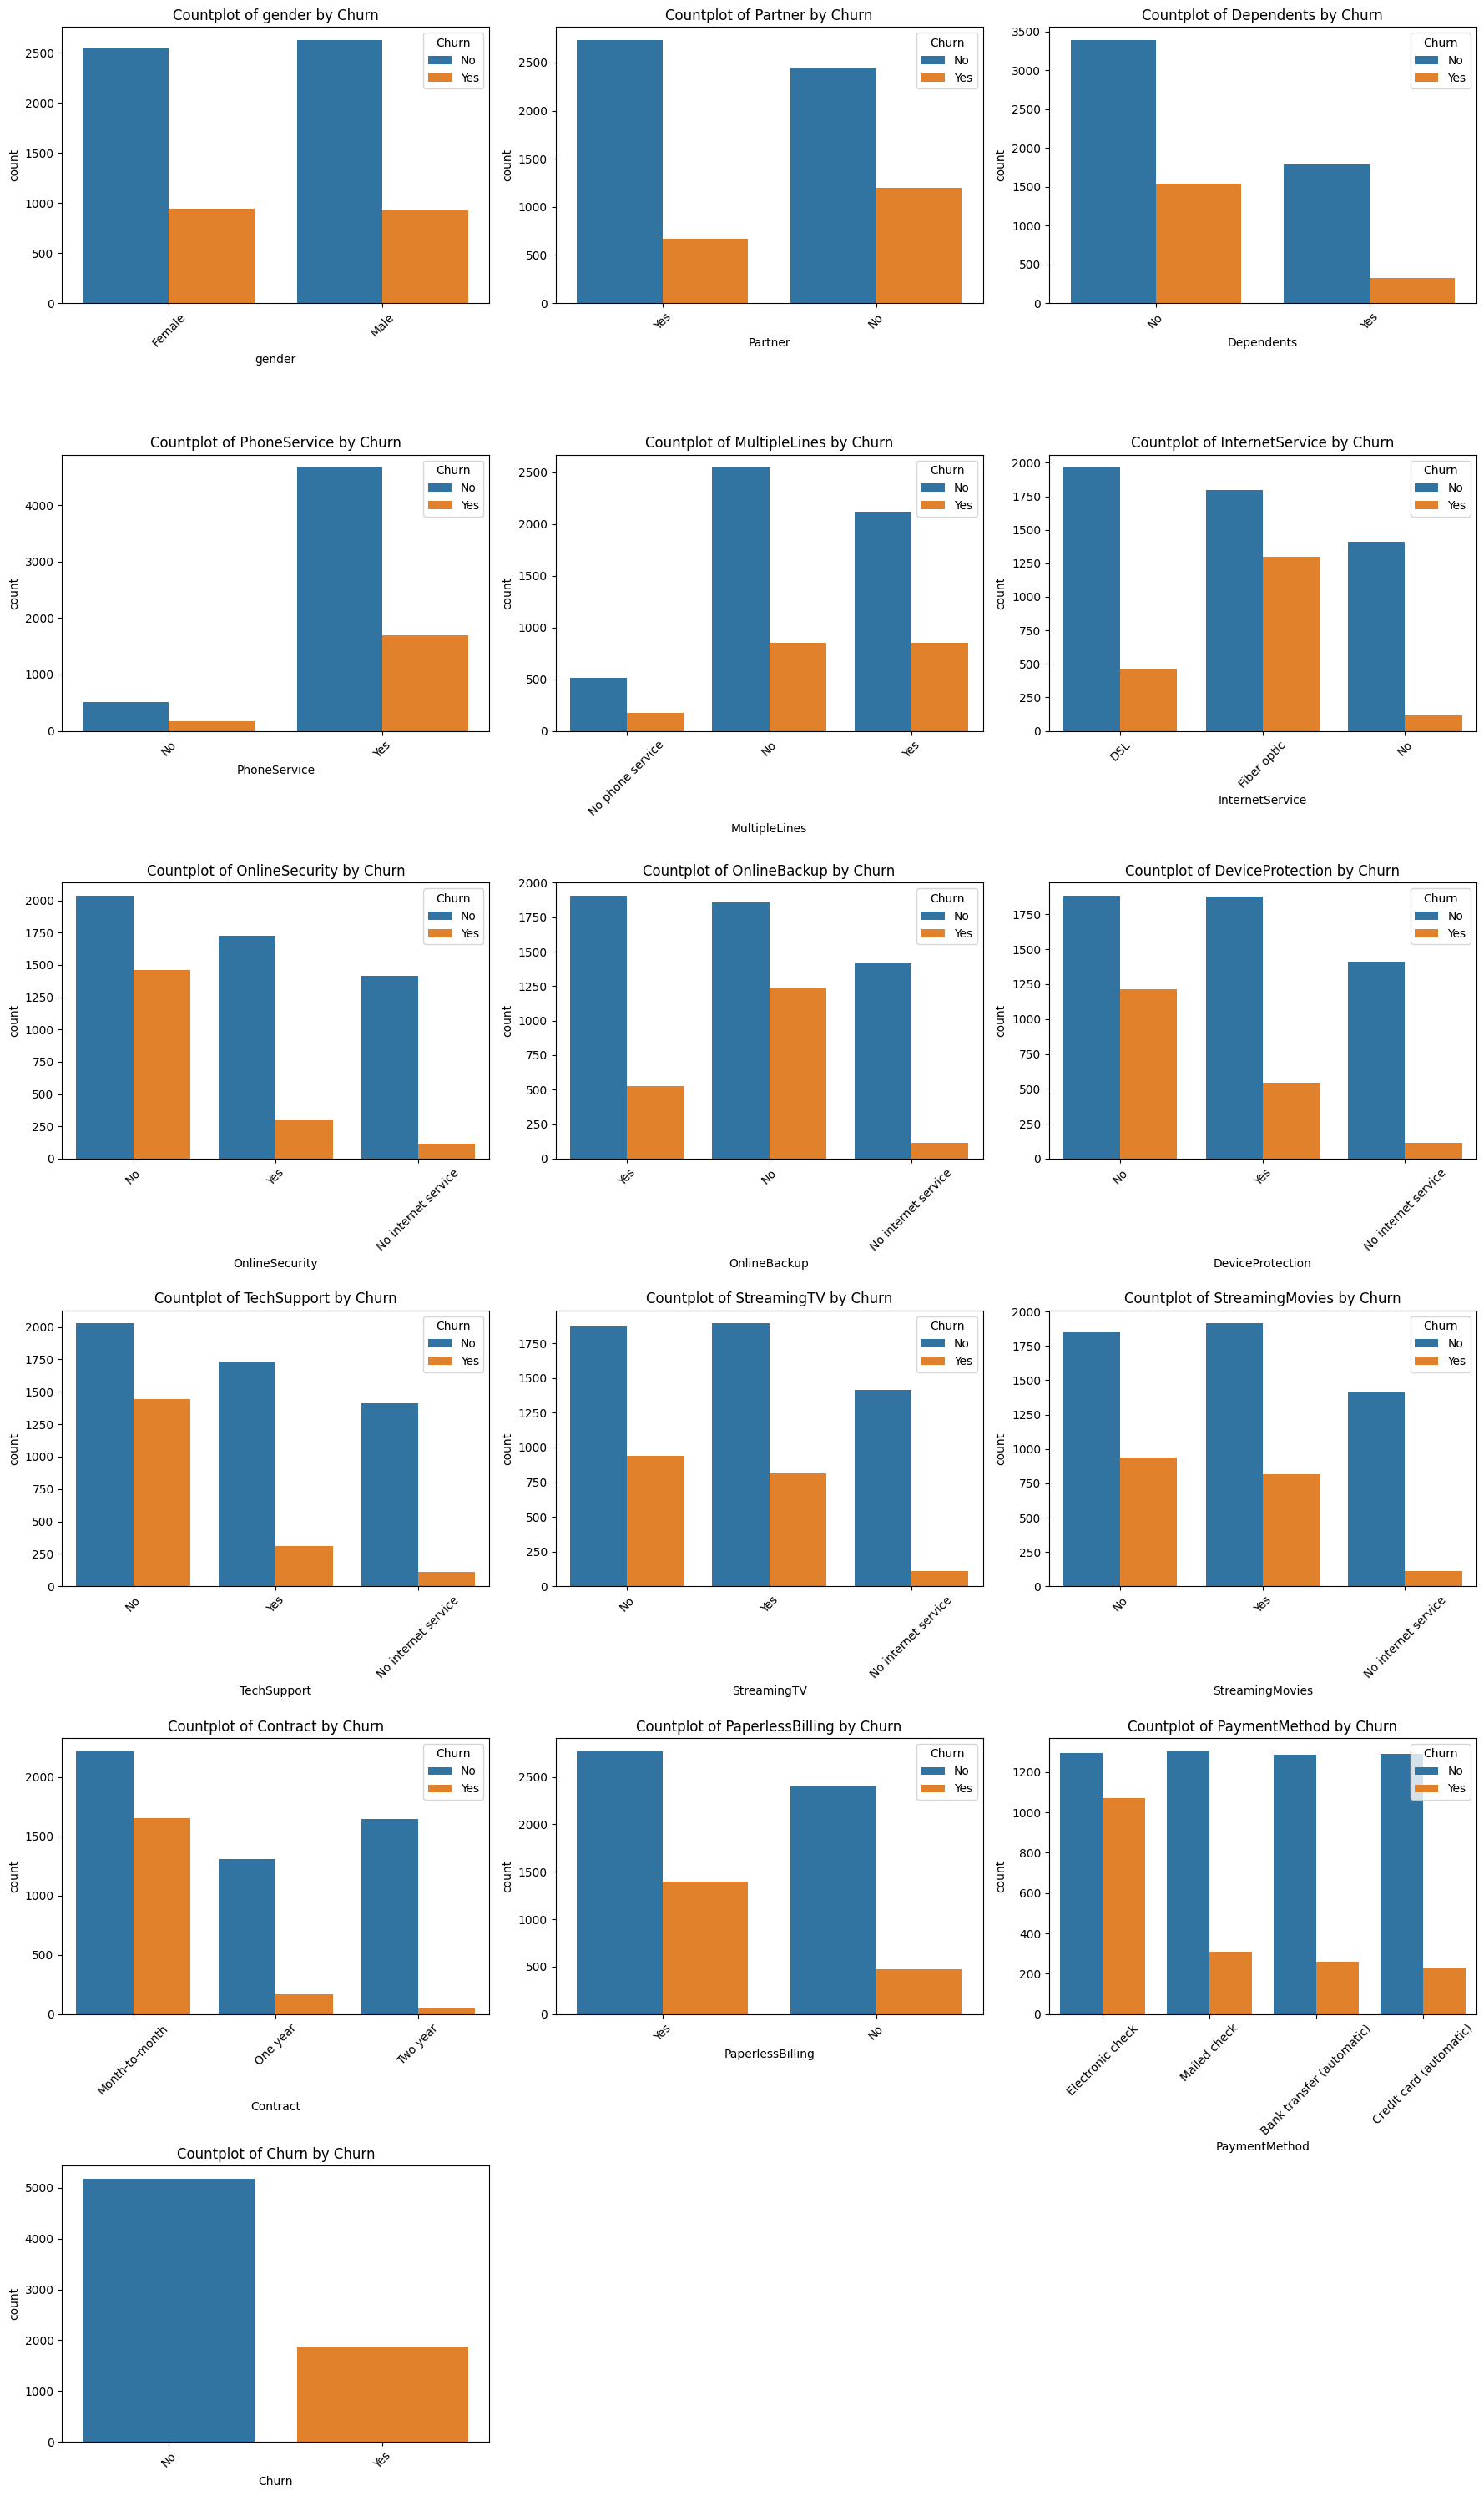

In [12]:
# Get the list of categorical columns (excluding 'Churn' if it's included)
categorical_columns = categorical_df.columns.tolist()

# Set up the subplot grid
num_plots = len(categorical_columns)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each categorical column and plot
for i, column in enumerate(categorical_columns):
    sns.countplot(data=categorical_df, x=column, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Countplot of {column} by Churn')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Observations:

When we compare the relationship between Churn and ctegorical features, the following are the findings.

1) Customers with dependents are likely to stay as compared to the customers without dependents.

2) Cutomers with no partners have low churn rate.

3) The customers using Fibre optic, No online backup, no online security, no device protection and no tech support have a high churn rate. On the other hand, the customers who have phone service, no multiple lines, has DSL Internet service, has no online security, has an online backup,no tech support and steam movies are likely to stay.

4) Customer son monthly contracts, have paperless billing and use electronic payment method have high churn rate while all payments method seem to have a balanced level of staying.

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1503,1,45,102.15,4735.35
5057,0,9,75.85,724.65
795,0,2,64.20,143.65
770,0,11,20.45,237.30
1742,0,2,87.15,183.75


In [16]:
churned = df[df['Churn'] == "Yes"]
not_churnes = df[df["Churn"] == "No"]

/tmp/ipykernel_6484/3769978445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churned, y=column, x=churned["Churn"], palette="magma", ax=axes[i])
/tmp/ipykernel_6484/3769978445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churned, y=column, x=churned["Churn"], palette="magma", ax=axes[i])
/tmp/ipykernel_6484/3769978445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churned, y=column, x=churned["Churn"], palette="magma", ax=axes[i])
/tmp/ipykernel_6484/3769978445.py:9: FutureWarning: 

Passing `palette` without

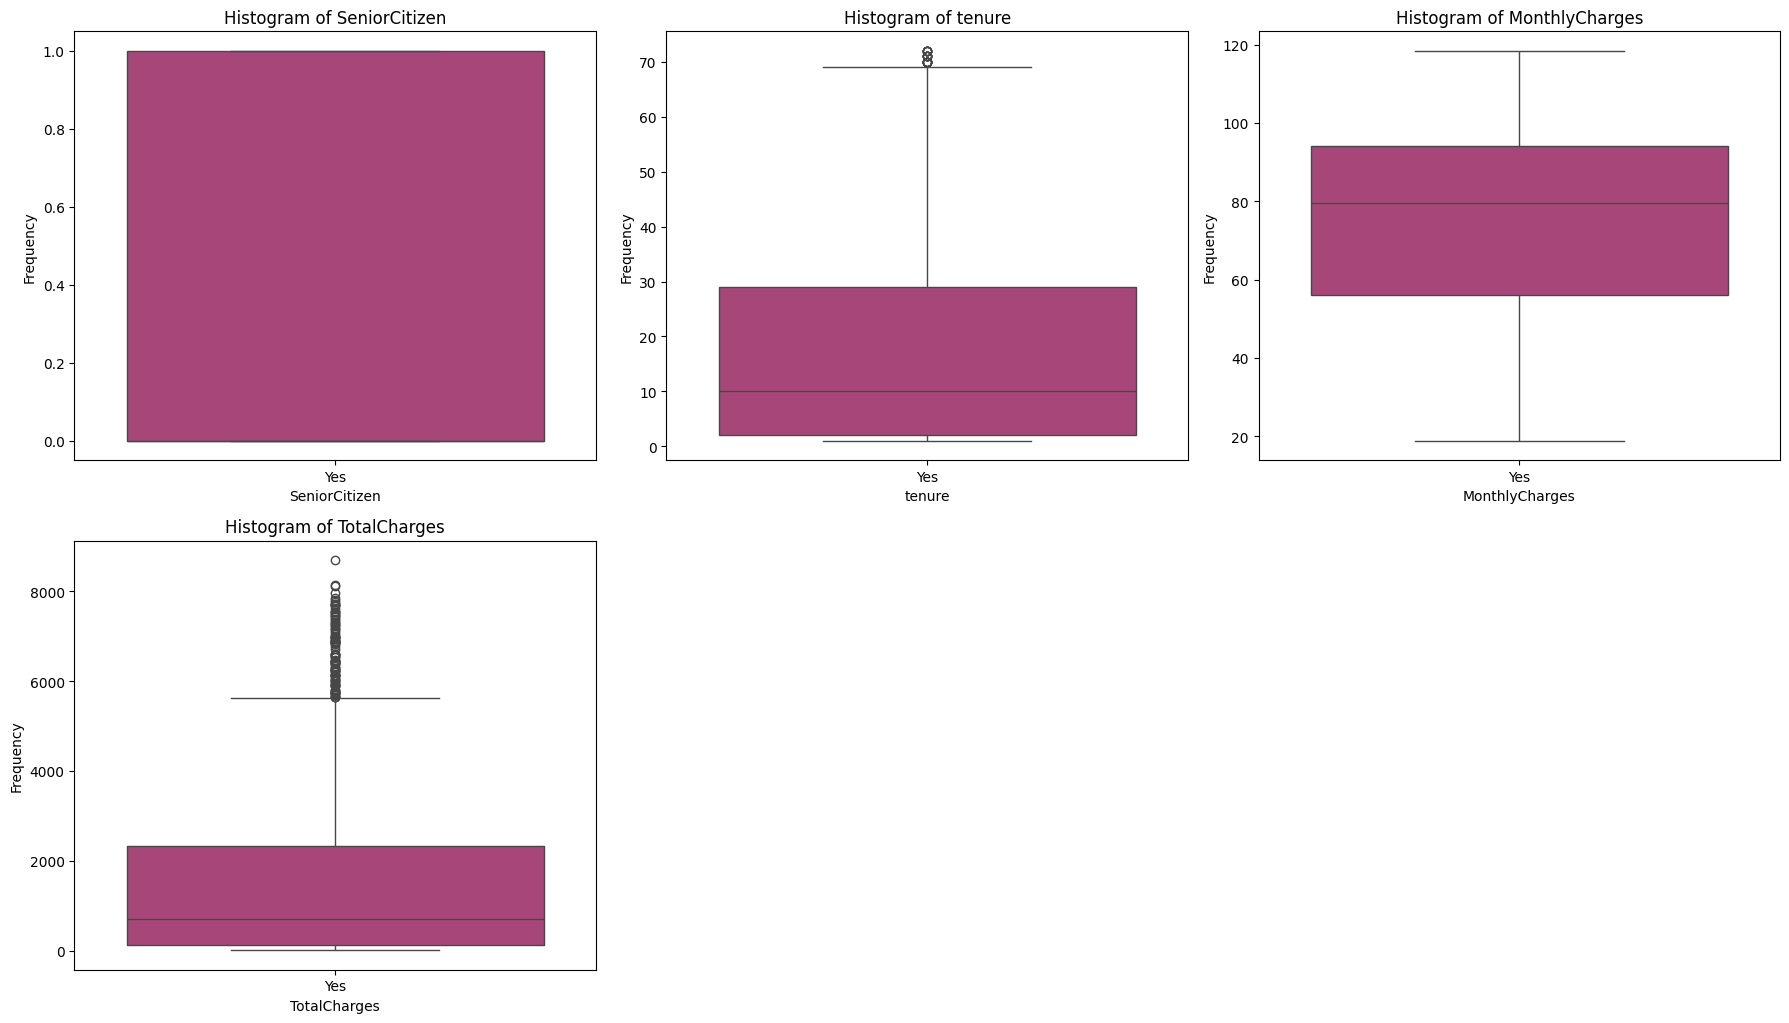

In [17]:
numerical_columns = numerical_df.columns.tolist()

num_plots = len(numerical_columns)
num_rows = (num_plots + 2) // 2
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows)) 
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=churned, y=column, x=churned["Churn"], palette="magma", ax=axes[i]) 
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipykernel_6484/2796939232.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=not_churnes, y=column, x=not_churnes["Churn"], palette="magma", ax=axes[i])
/tmp/ipykernel_6484/2796939232.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=not_churnes, y=column, x=not_churnes["Churn"], palette="magma", ax=axes[i])
/tmp/ipykernel_6484/2796939232.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=not_churnes, y=column, x=not_churnes["Churn"], palette="magma", ax=axes[i])
/tmp/ipykernel_6484/2796939232.py:9: FutureWarning: 

P

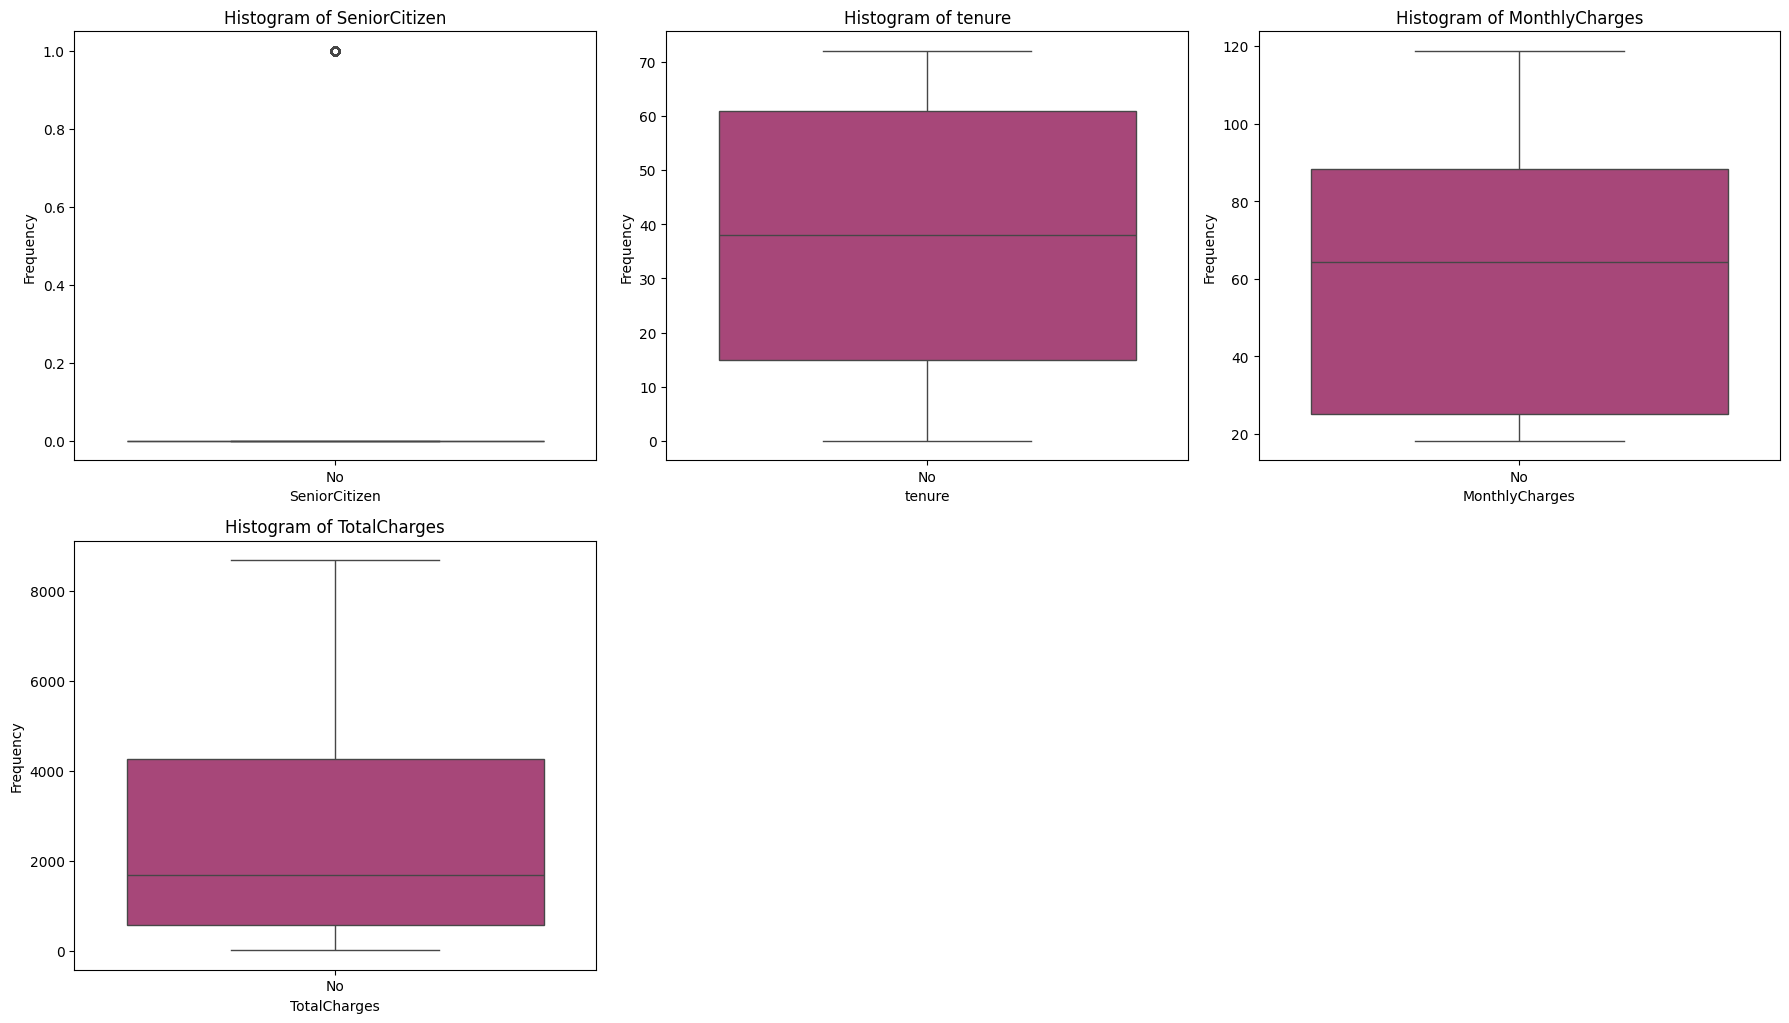

In [18]:
numerical_columns = numerical_df.columns.tolist()

num_plots = len(numerical_columns)
num_rows = (num_plots + 2) // 2
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows)) 
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=not_churnes, y=column, x=not_churnes["Churn"], palette="magma", ax=axes[i]) 
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

label_encoders


{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [20]:
for feature, encoder in label_encoders.items():
    mapping = {category: index for index, category in enumerate(encoder.classes_)}
    print(f"{feature}: {mapping}")

gender: {'Female': 0, 'Male': 1}
Partner: {'No': 0, 'Yes': 1}
Dependents: {'No': 0, 'Yes': 1}
PhoneService: {'No': 0, 'Yes': 1}
MultipleLines: {'No': 0, 'No phone service': 1, 'Yes': 2}
InternetService: {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity: {'No': 0, 'No internet service': 1, 'Yes': 2}
OnlineBackup: {'No': 0, 'No internet service': 1, 'Yes': 2}
DeviceProtection: {'No': 0, 'No internet service': 1, 'Yes': 2}
TechSupport: {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingTV: {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingMovies: {'No': 0, 'No internet service': 1, 'Yes': 2}
Contract: {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling: {'No': 0, 'Yes': 1}
PaymentMethod: {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
Churn: {'No': 0, 'Yes': 1}


In [21]:
df.sample(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5890,0383-CLDDA,0,0,0,0,69,1,2,0,2,...,2,2,2,2,2,1,1,85.35,5897.40,0
1625,1262-OPMFY,0,0,1,0,9,1,0,1,0,...,2,0,0,0,0,1,0,75.75,655.90,1
246,0303-UNCIP,1,0,0,0,41,1,2,0,0,...,2,0,0,2,1,0,3,65.00,2531.80,0
3225,4931-TRZWN,0,0,0,0,13,1,0,0,2,...,0,0,2,2,0,1,2,71.95,923.85,0
5413,6833-JMZYP,0,0,0,0,15,1,0,1,0,...,2,0,2,2,0,1,1,94.00,1505.45,0
6614,4086-WITJG,1,0,1,1,71,1,0,2,1,...,1,1,1,1,2,0,1,19.70,1301.10,0
3525,5889-JTMUL,0,1,1,0,50,1,2,1,0,...,2,0,2,0,0,1,2,95.05,4888.70,1
4218,9027-YFHQJ,1,0,0,0,7,1,2,2,1,...,1,1,1,1,0,1,0,25.05,152.95,0
2666,8414-OOEEL,1,0,0,1,66,1,0,0,0,...,2,2,2,2,2,1,1,79.50,5196.10,0
2064,7061-OVMIM,0,0,1,1,30,1,0,2,1,...,1,1,1,1,1,0,0,19.55,608.50,0


Split to x and y

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Define target variable
y = df['Churn']

# Define feature set
X = df.drop(columns=['Churn', 'customerID'])

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature selection

In [24]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00
5191,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30
5226,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15


In [25]:
X_train.fillna(X_train.mode().iloc[0], inplace=True)
X_test.fillna(X_test.mode().iloc[0], inplace=True)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier (you can use any model here, such as Logistic Regression, Random Forest, etc.)
model = RandomForestClassifier()

# Initialize RFE with the model and the desired number of features
rfe = RFE(estimator=model, n_features_to_select=10)  # Select 10 features

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['gender', 'tenure', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [27]:
# Using Slect Test

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2, k=10)

X_new = selector.fit_transform(X_train, y_train)

selected_features_kbest = list(X_train.columns[selector.get_support()])
selected_features_kbest

['SeniorCitizen',
 'Dependents',
 'tenure',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'MonthlyCharges',
 'TotalCharges']

In [28]:
# Using feature importance

# Fit a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Get sorted indices for feature importances
indices = importances.argsort()[::-1]

# Display the top 10 features
top_features = list(X_train.columns[indices[:10]])
print("Top 10 Features:", top_features)


Top 10 Features: ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'gender', 'PaperlessBilling', 'OnlineBackup']


In [29]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Find features with high correlation (e.g., above 0.5)
threshold = 0.36
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

print("Highly correlated features:", high_corr_vars)


Highly correlated features: {'Contract', 'InternetService', 'tenure', 'Dependents', 'MonthlyCharges', 'TotalCharges', 'OnlineBackup', 'StreamingMovies', 'DeviceProtection'}


In [30]:
# If we cross check accross all the methods of selection, we can conclude that following are the best features

final_features = ['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'TotalCharges', 'MonthlyCharges', "Churn"]

In [31]:
# Select new features

df = df[final_features]

In [32]:
print(df.isnull().sum().sum())  # Should print 0


11


In [33]:
# Fix na incase any

df.fillna(df.mode().iloc[0], inplace=True)

In [34]:
print(df.isnull().sum().sum())  # Should print 0

0


In [35]:
# Prepare for modelling
y = df['Churn']
X = df.drop(columns="Churn")

y.shape, X.shape

((7043,), (7043, 7))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELLING

For this part, the modelling was devided into two parts: the imbalanced and balanced data. The algorithms used are logistic regressing, Decision Tree, Random Forest, and SVM.

The results were compared and the conclusion made.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

In [38]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train, y_train)

/home/sean/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True, random_state=42)

In [39]:
# List of trained models
models = [logreg, dt, rf, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Initialize evaluation dictionaries
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Evaluate each model
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['ROC AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Create a DataFrame to display results
evaluation_df = pd.DataFrame(metrics)
evaluation_df['Model'] = model_names  # Add model names as a column

# Reorder columns to have 'Model' first
evaluation_df = evaluation_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

/home/sean/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
evaluation_df.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.806955,0.651652,0.581769,0.614731,0.856099
1,Decision Tree,0.741661,0.511749,0.525469,0.518519,0.677979
2,Random Forest,0.792051,0.633333,0.509383,0.564636,0.817354
3,SVM,0.735273,0.000000,0.000000,0.000000,0.814771


/tmp/ipykernel_6484/3913373952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(evaluation_df, x="Model", y="Accuracy", palette="magma")


<Axes: xlabel='Model', ylabel='Accuracy'>

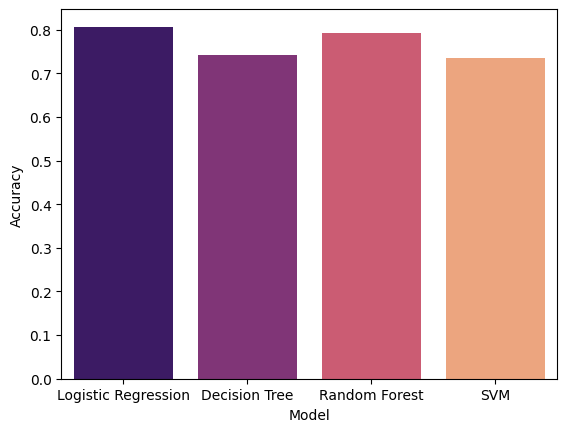

In [41]:
# evaluation_df.plot(kind="bar", x="Model", y="Accuracy")
sns.barplot(evaluation_df, x="Model", y="Accuracy", palette="magma")

# SMOTE

In [43]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [imblearn]1/3 [imbalanced-learn]


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state=42, k_neighbors=2)

X_r, y_r = smote.fit_resample(X, y)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [46]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_res, y_train_res)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_res, y_train_res)

/home/sean/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True, random_state=42)

In [47]:
# List of trained models
models = [logreg, dt, rf, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Initialize evaluation dictionaries
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Evaluate each model
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['ROC AUC'].append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Create a DataFrame to display results
evaluation_df = pd.DataFrame(metrics)
evaluation_df['Model'] = model_names  # Add model names as a column

# Reorder columns to have 'Model' first
evaluation_df = evaluation_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]
evaluation_df.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.755855,0.525573,0.798928,0.634043,0.852504
1,Decision Tree,0.916962,0.838624,0.849866,0.844208,0.906398
2,Random Forest,0.924060,0.850000,0.865952,0.857902,0.954680
3,SVM,0.694109,0.444444,0.621984,0.518436,0.758170


/tmp/ipykernel_6484/3913373952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(evaluation_df, x="Model", y="Accuracy", palette="magma")


<Axes: xlabel='Model', ylabel='Accuracy'>

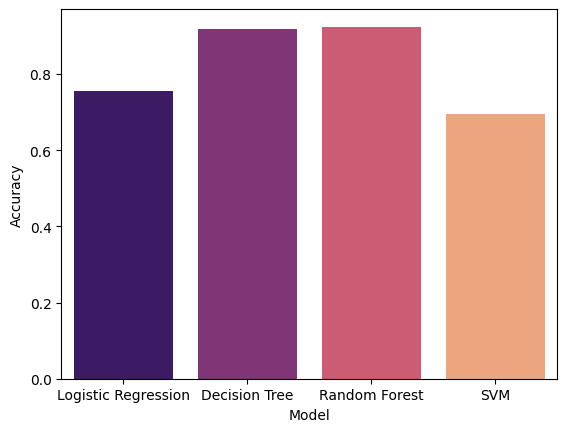

In [48]:
# evaluation_df.plot(kind="bar", x="Model", y="Accuracy")
sns.barplot(evaluation_df, x="Model", y="Accuracy", palette="magma")

Comparing the two scenarios, the balanced data seems to perform better on Decision Tree and Random Forest Classifiers. In this case, our model is best suited for random forest classisfier. Therefore, for deployment, I used RFC.

# SAVE THE MODEL

Features: ['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'TotalCharges', 'MonthlyCharges', "Churn"]

In [56]:
import os
from joblib import dump
from sklearn.ensemble import RandomForestClassifier

In [57]:
os.makedirs('models', exist_ok=True)

In [59]:
rfc_model = RandomForestClassifier(n_estimators=200, random_state=42)

rfc_model.fit(X_train_res, y_train_res)

# Save the model to a file
with open('churn.pkl', 'wb') as file:
	dump(rfc_model, file)